In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import sympy as smp
from IPython.display import display 

In [10]:
x = smp.symbols("x")
function = 3*x**2 - 2*x+4
f = smp.exp(2)
display(function)

def f(x):
    return 3*x**2-3*x+4

def diff(x):
    return 6*x - 3

# display(diff(function)) 

3*x**2 - 2*x + 4

[-2.    -1.998 -1.996 ...  1.996  1.998  2.   ]


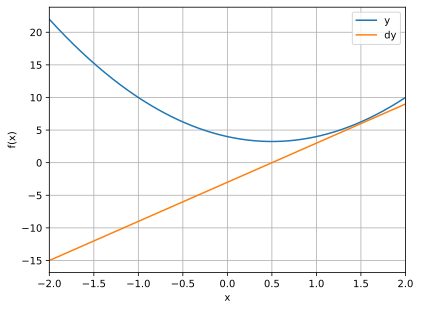

In [44]:
#One-Dimension
x_range = np.linspace(-2,2,2001)

print(x_range)
#plotting
plt.plot(x_range,f(x_range), x_range,diff(x_range))
plt.xlim(x_range[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

In [45]:

localmin = np.random.choice(x_range,1)
epochs = 100
learning_rate = .01

for i in range(epochs):
    grad = diff(localmin)
    localmin = localmin - learning_rate*grad

localmin
    

array([0.49592724])

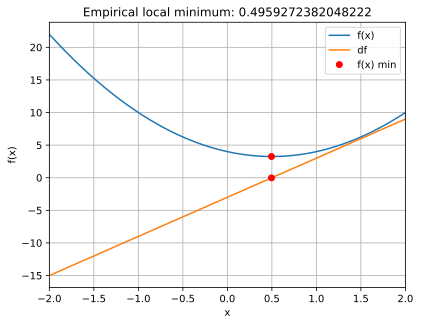

In [46]:
plt.plot(x_range,f(x_range), x_range,diff(x_range))
plt.plot(localmin,diff(localmin),'ro')
plt.plot(localmin,f(localmin),'ro')

plt.xlim(x_range[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

Storing the values 

In [47]:
localmin = np.random.choice(x_range,1)

# learning parameters
learning_rate = .01
training_epochs = 100

# run through training and store all the results
modelparams = np.zeros((training_epochs,2)) #Creating an array of size 100 and each row contains localmin and grad 
for i in range(training_epochs):
  grad = diff(localmin)
  localmin = localmin - learning_rate*grad
  modelparams[i,0] = localmin[0] #modelparams = [[localmin,grad]] stores rows io local min and grad
  modelparams[i,1] = grad[0]
modelparams

array([[-4.75720000e-01, -6.22800000e+00],
       [-4.17176800e-01, -5.85432000e+00],
       [-3.62146192e-01, -5.50306080e+00],
       [-3.10417420e-01, -5.17287715e+00],
       [-2.61792375e-01, -4.86250452e+00],
       [-2.16084833e-01, -4.57075425e+00],
       [-1.73119743e-01, -4.29650900e+00],
       [-1.32732558e-01, -4.03871846e+00],
       [-9.47686047e-02, -3.79639535e+00],
       [-5.90824884e-02, -3.56861163e+00],
       [-2.55375391e-02, -3.35449493e+00],
       [ 5.99471322e-03, -3.15322523e+00],
       [ 3.56350304e-02, -2.96403172e+00],
       [ 6.34969286e-02, -2.78618982e+00],
       [ 8.96871129e-02, -2.61901843e+00],
       [ 1.14305886e-01, -2.46187732e+00],
       [ 1.37447533e-01, -2.31416468e+00],
       [ 1.59200681e-01, -2.17531480e+00],
       [ 1.79648640e-01, -2.04479591e+00],
       [ 1.98869722e-01, -1.92210816e+00],
       [ 2.16937538e-01, -1.80678167e+00],
       [ 2.33921286e-01, -1.69837477e+00],
       [ 2.49886009e-01, -1.59647228e+00],
       [ 2.

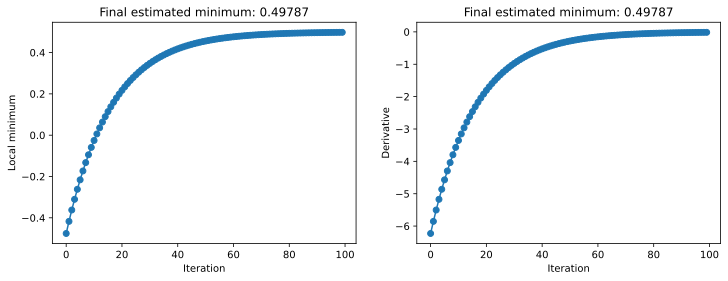

In [48]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i],'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

CODE CHALLANGE 

In [58]:

# Define symbolic variable
y = smp.symbols('y')
pi = 3.14

# Define function symbolically
fun = smp.cos(2 * pi * y) + y**2
dev = smp.diff(fun, y)  # Differentiate w.r.t y

# Display expressions
display(fun)
display(dev)

# Convert symbolic expressions to callable Python functions
function = smp.lambdify(y, fun)
derivative = smp.lambdify(y, dev)



y**2 + cos(6.28*y)

2*y - 6.28*sin(6.28*y)

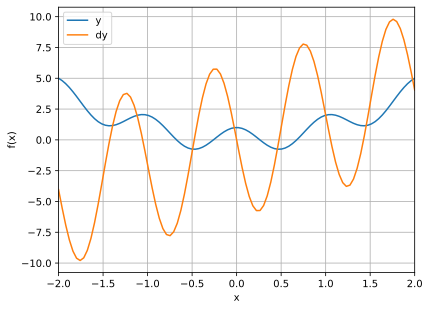

In [59]:
x_arr = np.linspace(-2,2,100)

x_arr

#plotting
plt.plot(x_arr,function(x_arr), x_arr,derivative(x_arr))
plt.xlim(x_range[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

In [131]:
#Gradient Descent
localmin = np.random.choice(x_arr,1)
# localmins = np.array([0])
learning_rate = .01
epochs = 100

model_param = np.zeros((epochs,2))
for i in range(epochs):
    grad = derivative(localmin)
    localmin = localmin - grad * learning_rate
    model_param[i,0] = localmin[0]
    model_param[i,1] = grad[0]

model_param
    

array([[-4.69279685e-01,  4.63321988e-01],
       [-4.72032823e-01,  2.75313861e-01],
       [-4.73663821e-01,  1.63099747e-01],
       [-4.74628465e-01,  9.64643929e-02],
       [-4.75198478e-01,  5.70013393e-02],
       [-4.75535128e-01,  3.36649582e-02],
       [-4.75733893e-01,  1.98765638e-02],
       [-4.75851229e-01,  1.17335380e-02],
       [-4.75920487e-01,  6.92583977e-03],
       [-4.75961365e-01,  4.08780270e-03],
       [-4.75985491e-01,  2.41263781e-03],
       [-4.75999731e-01,  1.42391915e-03],
       [-4.76008134e-01,  8.40375189e-04],
       [-4.76013094e-01,  4.95972941e-04],
       [-4.76016021e-01,  2.92712249e-04],
       [-4.76017749e-01,  1.72751855e-04],
       [-4.76018768e-01,  1.01953914e-04],
       [-4.76019370e-01,  6.01706500e-05],
       [-4.76019725e-01,  3.55111944e-05],
       [-4.76019935e-01,  2.09578016e-05],
       [-4.76020058e-01,  1.23687580e-05],
       [-4.76020131e-01,  7.29972355e-06],
       [-4.76020174e-01,  4.30810924e-06],
       [-4.

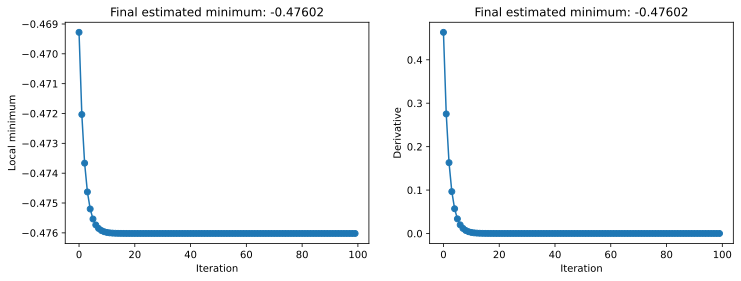

In [132]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
  ax[i].plot(model_param[:,i],'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

In [95]:
import pandas as pd 


arr = np.linspace(1,10,10)
arr_log = np.log(arr)

labels = [ 'values','logs']

pandass = { labels[0]: arr,labels[1] : arr_log}

res = pd.DataFrame(pandass)
res

,values,logs
0,1.0,0.000000
1,2.0,0.693147
2,3.0,1.098612
3,4.0,1.386294
4,5.0,1.609438
5,6.0,1.791759
6,7.0,1.945910
7,8.0,2.079442
8,9.0,2.197225
9,10.0,2.302585


In [93]:
names = ['aplha','beta','gaama']
numbers = [10,20,30]

res = dict()
ret = dict(zip(names,numbers))

# for a,b in zip(names,numbers):
#     ret.update({a:b})

for a,l in enumerate(names):
    res.update({l:numbers[a]})

print(ret)
print(res) 

{'aplha': 10, 'beta': 20, 'gaama': 30}
{'aplha': 10, 'beta': 20, 'gaama': 30}


In [123]:
n :int= 10000
from time import perf_counter as t

res = [0] * n

for i in range(n) :
    res[i] = i * 2
    

In [130]:
#npa = np.zeros(n)

for i in range(n):
    npa[i]=i
npa


array([0.000e+00, 1.000e+00, 2.000e+00, ..., 9.997e+03, 9.998e+03,
       9.999e+03], shape=(10000,))